# Mental Health in Tech Industry Analysis

### Requirements:
This notebook aims to analyze the "Mental Health in the Tech Industry" dataset. The objectives of this analysis are:
1. To provide an overview of the respondents demographics like Age, Gender, Nationality.
2. To perform exploratory data analysis (EDA) to identify patterns and trends in mental health within the tech industry.
3. To analyze the prevalence of mental health conditions and provide confidence intervals to communicate uncertainty.
4. To provide recommendations for future improvements in data collection and analysis.

Through this analysis, we hope to gain insights into the state of mental health in tech and explore the impact of demographics on mental health conditions.

### Plan of Action:
1. importing libraries
2. Defining Some functions
3. Connecting to DataBase
4. Review Data - performing queries to understand tables
5. Performing exploratory data analysis
   - SocioDemographics Overview
   - Employment Demographics
   - Mental Health Statistics
7. Reporting the prevalence rate of at least three mental diseases
8. Conclusion and Further Improvements

In [1]:
#importing libraries 
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pointbiserialr, spearmanr, ttest_ind

### Plot Functions

In [2]:
def create_barplot(data, x, y, title, xlabel, ylabel):
    """
    Creates a bar plot using Seaborn with the specified data and plot attributes.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data to be plotted.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str): The title of the bar plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.

    Returns:
        plot

    Raises:
        ValueError: If the 'data' parameter is not a valid pandas DataFrame.
        ValueError: If either 'x' or 'y' parameter is not a valid column in the DataFrame.

    Example:
        >>> import seaborn as sns
        >>> import pandas as pd
        >>> create_barplot(my_dataframe, 'column_x', 'column_y', 'My Bar Plot', 'X-axis Label', 'Y-axis Label')
    """
    ax = sns.barplot(x=x, y=y, data=data)
    sns.despine()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return ax

In [3]:
def create_barplot_hue(data, x, y, hue, title, xlabel, ylabel):
    """
    Creates a bar plot using Seaborn with the specified data and plot attributes, incorporating hue.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data to be plotted.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        hue (str): The column name to differentiate bars by color.
        title (str): The title of the bar plot.
        xlabel (str): The label for the x-axis.
        ylabel (str): The label for the y-axis.

    Returns:
        None

    Raises:
        ValueError: If the 'data' parameter is not a valid pandas DataFrame.
        ValueError: If either 'x' or 'y' parameter is not a valid column in the DataFrame.
        ValueError: If 'hue' parameter is not a valid column in the DataFrame.

    Example:
        >>> import seaborn as sns
        >>> import pandas as pd
        >>> create_barplot_hue(my_dataframe, 'column_x', 'column_y', 'category_column', 'My Bar Plot with Hue', 'X-axis Label', 'Y-axis Label')
    """
    sns.barplot(x=x, y=y, hue=hue, data=data)
    sns.despine()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Labelling Plots

In [4]:
# Define the add_percentage_to_plot function to add percentages on top of bars
def add_percentage_to_plot(ax):
    total = sum([p.get_height() for p in ax.patches])  
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'  
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9),
                    textcoords='offset points')

## Connecting Database

In [5]:
# Connect to the SQLite database
conn = sqlite3.connect('mental_health.sqlite')

# Query to list all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
tables

,name
0,Answer
1,Question
2,Survey


## Review Data

### Understanding Answer Table

In [6]:
answer_df = pd.read_sql("SELECT * FROM Answer", conn)
answer_df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [7]:
answer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB


In [8]:
answer_df.UserID.nunique()

4218

Observation: The Answer table contains 236,898 rows, including two foreign keys: SurveyID and QuestionID. A total of 4,218 participants completed the survey.

### Understanding Question Table

In [9]:
question_df = pd.read_sql("SELECT * FROM Question", conn)
question_df

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [10]:
pd.set_option('display.max_colwidth', None)
question_df.head(40)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [11]:
question_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questiontext  105 non-null    object
 1   questionid    105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


Observation: The Question table includes 105 rows, but there should be a total of 118 questions. This indicates that questions 35 through 47 are missing for some reason.

### Understanding Survey Table

In [12]:
survey_df = pd.read_sql("SELECT * FROM Survey", conn)
survey_df

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SurveyID     5 non-null      int64 
 1   Description  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


Observation: The Survey table is missing data for the year 2015. This table includes SurveyID as its primary key.

## Initial Data Cleaning - Checking for missing values and duplicates

In [14]:
datasets = [answer_df, question_df, survey_df]

In [15]:
for dataset in datasets:
    print(dataset.duplicated().any())

False
False
False


In [16]:
for dataset in datasets:
    print(dataset.isna().any().any())

False
False
False


After running checks on all three datasets—`answer_df`, `question_df`, and `survey_df`—we found that there are no duplicate rows in any of the datasets (all returned `False`). Additionally, no missing values were detected across any of the datasets, as each check returned `False`.

### Consolidated Survey Data with User Responses, Questions, and Survey Descriptions

In [17]:
query = """
SELECT 
    s.SurveyID as year,
    s.Description as survey_description,
    a.UserID as user_id,
    a.QuestionID as question_id,
    q.QuestionText as question_text,
    a.AnswerText as answer_text
FROM Answer a
JOIN Question q ON a.QuestionID = q.QuestionID
JOIN Survey s ON a.SurveyID = s.SurveyID
"""

df = pd.read_sql_query(query, conn)

df.columns = df.columns.str.lower()

df.head()

,year,survey_description,user_id,question_id,question_text,answer_text
0,2014,mental health survey for 2014,1,1,What is your age?,37
1,2014,mental health survey for 2014,2,1,What is your age?,44
2,2014,mental health survey for 2014,3,1,What is your age?,32
3,2014,mental health survey for 2014,4,1,What is your age?,31
4,2014,mental health survey for 2014,5,1,What is your age?,31


## Understanding Dataset More and performing exploratory data analysis

In [18]:
#How many users have replied for each survey?
query = """SELECT SurveyID, COUNT(DISTINCT UserID) AS TotalUsers
 FROM Answer 
 GROUP BY SurveyID;
 """

yearly_respondents = pd.read_sql_query(query, conn)
yearly_respondents

,SurveyID,TotalUsers
0,2014,1260
1,2016,1433
2,2017,756
3,2018,417
4,2019,352


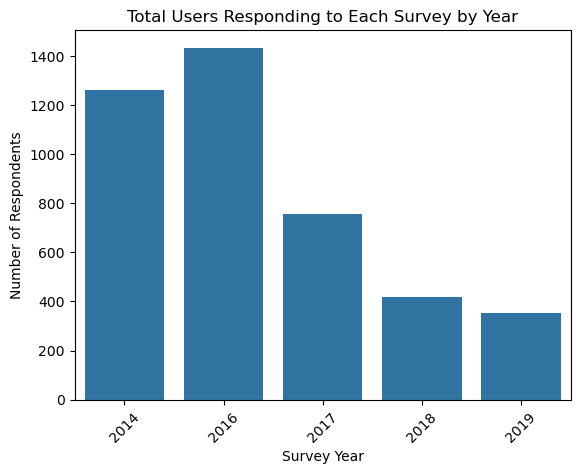

In [19]:
sns.barplot(x='SurveyID', y='TotalUsers', data=yearly_respondents)

plt.title('Total Users Responding to Each Survey by Year')
plt.xlabel('Survey Year')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45) 
plt.show()

**Observation:**

The bar chart illustrates the number of users who responded to each survey across different years. Here are the key insights:

- **2016** had the highest number of respondents, with **1,433 users** participating.
- **2014** also saw a high response rate, with **1,260 users** completing the survey.
- There was a significant decline in participation over the following years, with **2017** and **2018** showing a gradual drop to **756** and **417 respondents** respectively.
- **2019** recorded the lowest response rate, with only **352 users** participating.

This trend may indicate a decreasing engagement with the surveys over time, suggesting the need to explore potential reasons for this decline in respondent numbers after 2016.

In [20]:
#Did all the surveys have the same questions? And how many replies did each get?
query = """SELECT SurveyID, QuestionID, COUNT(1) AS TotalReplies
FROM Answer
GROUP BY SurveyID, QuestionID;
"""

questions_for_each_survey = pd.read_sql_query(query, conn)
questions_for_each_survey

,SurveyID,QuestionID,TotalReplies
0,2014,1,1260
1,2014,2,1260
2,2014,3,1260
3,2014,4,1260
4,2014,5,1260
...,...,...,...
309,2019,85,352
310,2019,86,352
311,2019,87,352
312,2019,88,352


The data reveals that the surveys do not all contain the same set of questions. While some questions are common across multiple surveys, the total number of replies varies by both SurveyID and QuestionID.

In [21]:
#checking for the questionID that Total number of users to number of replies
merged_data = pd.merge(questions_for_each_survey, yearly_respondents, on='SurveyID')

merged_data['RepliesMatch'] = merged_data['TotalReplies'] == merged_data['TotalUsers']

mismatched_replies = merged_data[merged_data['RepliesMatch'] == False]
mismatched_replies

,SurveyID,QuestionID,TotalReplies,TotalUsers,RepliesMatch
82,2016,115,2072,1433,False
83,2016,116,1793,1433,False
84,2016,117,2692,1433,False


In [22]:
query = """SELECT *
FROM Answer
WHERE SurveyID=2016 AND QuestionID BETWEEN 115 AND 117;
"""

pd.read_sql_query(query, conn)

,AnswerText,SurveyID,UserID,QuestionID
0,-1,2016,1261,115
1,"Anxiety Disorder (Generalized, Social, Phobia, etc)",2016,1262,115
2,"Mood Disorder (Depression, Bipolar Disorder, etc)",2016,1262,115
3,-1,2016,1263,115
4,"Anxiety Disorder (Generalized, Social, Phobia, etc)",2016,1264,115
...,...,...,...,...
6552,Other,2016,2689,117
6553,Support,2016,2690,117
6554,Back-end Developer,2016,2691,117
6555,DevOps/SysAdmin,2016,2692,117


In questions 115-117 from the 2016 survey, it appears that several users provided multiple answers, resulting in more replies than the total number of unique users.

In [23]:
#How many questions did each survey have?
questions_per_survey = questions_for_each_survey.groupby(by="SurveyID").size()
questions_per_survey = questions_per_survey.reset_index()
questions_per_survey.columns = ["SurveyID", "count"]
questions_per_survey

,SurveyID,count
0,2014,26
1,2016,60
2,2017,76
3,2018,76
4,2019,76


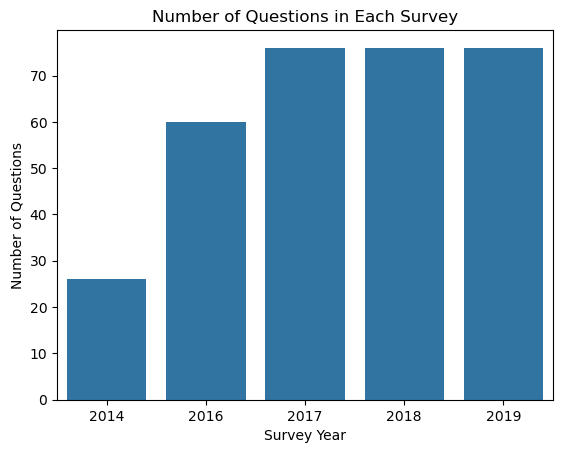

In [24]:
sns.barplot(x='SurveyID', y='count', data=questions_per_survey)
plt.title('Number of Questions in Each Survey')
plt.xlabel('Survey Year')
plt.ylabel('Number of Questions')
plt.show()

Both 2014 and 2016 had fewer questions compared to the surveys from 2017 to 2019. Despite 2014 having a large number of users, it had only around 34% of the number of questions in comparison to the later surveys, which likely contributed to the lower number of replies it received.

In [25]:
#Any users replied to several surveys ?
query = """SELECT UserID, COUNT(DISTINCT SurveyID) AS NumberOfSurveys
FROM Answer
GROUP BY UserID
HAVING NumberOfSurveys>1;
"""

pd.read_sql_query(query, conn)

,UserID,NumberOfSurveys


No, all users have only participated in a single survey.

### Age Distribution of Survey Respondents

In [26]:
# Clean age data by removing impossible values
age_df = df[df['question_text'] == 'What is your age?']
clean_age = pd.to_numeric(age_df['answer_text'], errors='coerce')
clean_age = clean_age[(clean_age >= 16) & (clean_age <= 80)]  # Reasonable age range
clean_age_stats = clean_age.describe()

clean_age_stats

count    4203.000000
mean       33.855817
std         8.068257
min        17.000000
25%        28.000000
50%        33.000000
75%        38.000000
max        74.000000
Name: answer_text, dtype: float64

In [27]:
# Let's also look at age distribution by year
age_by_year = age_df.copy()
age_by_year['clean_age'] = pd.to_numeric(age_by_year['answer_text'], errors='coerce')
age_by_year = age_by_year[(age_by_year['clean_age'] >= 18) & (age_by_year['clean_age'] <= 100)]
yearly_age_stats = age_by_year.groupby('year')['clean_age'].describe()

yearly_age_stats

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2014,1252.0,32.083866,7.289722,18.0,27.0,31.0,36.0,72.0
2016,1429.0,34.131561,8.263825,19.0,28.0,33.0,39.0,99.0
2017,754.0,34.988064,8.338051,18.0,29.0,34.0,40.0,67.0
2018,417.0,34.916067,8.047047,19.0,29.0,34.0,39.0,67.0
2019,351.0,35.595442,8.891819,19.0,29.0,34.0,41.0,64.0


### What is the Sample Size?

In [28]:
# Number of unique respondents based on UserID
sample_size = df['user_id'].nunique()
print(f"Sample Size: {sample_size}")

Sample Size: 4218


In [29]:
age_responses = age_df[age_df['question_text'] == "What is your age?"].copy()
age_responses['answer_text'] = pd.to_numeric(age_responses['answer_text'], errors='coerce')
age_responses['answer_text'].describe()

count    4218.000000
mean       33.915363
std        10.478054
min       -29.000000
25%        28.000000
50%        33.000000
75%        38.000000
max       329.000000
Name: answer_text, dtype: float64

#### Summaries

In [30]:
# Categorical Summaries
print("\nCategorical Summaries:")
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    value_counts = df[col].value_counts().head(10).reset_index() 
    value_counts.columns = [col, 'Count']
    print(value_counts.to_string(index=False))


Categorical Summaries:

Value Counts for survey_description:
           survey_description  Count
mental health survey for 2016  88238
mental health survey for 2017  57456
mental health survey for 2014  32760
mental health survey for 2018  31692
mental health survey for 2019  26752

Value Counts for question_text:
                                                                                                                                 question_text  Count
                                                                                                                             What is your age?   4218
                                                                                    How many employees does your company or organization have?   4218
                                                                                                                          What is your gender?   4218
Is your anonymity protected if you choose to take advantage of mental health or sub

In [31]:
# Query to find the most commonly answered questions
query = """
SELECT 
    Question.QuestionID AS QuestionId,
    COUNT(AnswerText) AS TotalUsersAnswered
FROM 
    Question
JOIN
    Answer ON Question.QuestionID = Answer.QuestionID
GROUP BY 
    Question.QuestionID
"""

questions_df = pd.read_sql_query(query, conn)
pd.set_option('display.max_colwidth', None)

questions_df_grouped = (
    questions_df
    .groupby('TotalUsersAnswered')['QuestionId']
    .apply(list)
    .reset_index(name='QuestionIdList')
    .sort_values(by='TotalUsersAnswered', ascending=False)
    .reset_index(drop=True)
)
questions_df_grouped

,TotalUsersAnswered,QuestionIdList
0,4218,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,2958,"[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56]"
2,2693,"[90, 91]"
3,2692,[117]
4,2072,[115]
5,1793,[116]
6,1525,"[57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]"
7,1433,"[104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 118]"
8,1260,"[92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103]"


The table shows that all survey participants responded to questions 1 through 12. After these initial questions, however, the number of responses begins to drop significantly. Interestingly, participants did not answer the remaining questions in a sequential order. Beyond the first 12 questions, question 117 received 2,692 responses, question 115 received 2,072, and question 116 received 1,793. The response count continues to decrease for the questions that follow.

## SocioDemographics Overview

### Age Group Distribution Observations

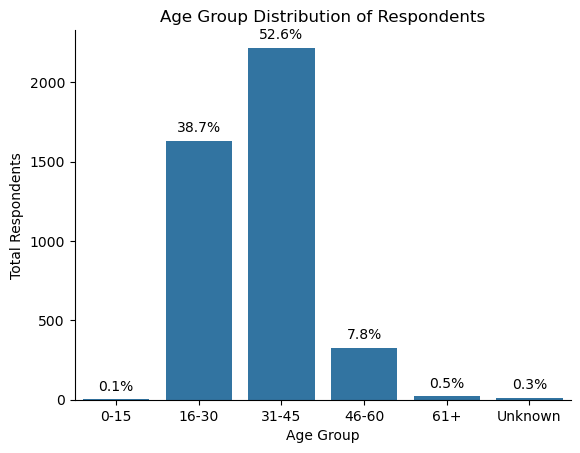

In [32]:
query = """
SELECT 
    COUNT(Answer.UserID) as Total, 
    CASE
        WHEN Answer.AnswerText BETWEEN 0 AND 15 THEN '0-15'
        WHEN Answer.AnswerText BETWEEN 16 AND 30 THEN '16-30'
        WHEN Answer.AnswerText BETWEEN 31 AND 45 THEN '31-45'
        WHEN Answer.AnswerText BETWEEN 46 AND 60 THEN '46-60'
        WHEN Answer.AnswerText > 61 THEN '61+'
        ELSE 'Unknown'
    END as AgeGroup
FROM 
    Answer
JOIN 
    Question ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 1
GROUP BY 
    AgeGroup
"""
age_group_df = pd.read_sql_query(query, conn)

ax = create_barplot(age_group_df, 'AgeGroup', 'Total', 'Age Group Distribution of Respondents', 'Age Group', 'Total Respondents')
add_percentage_to_plot(ax)
plt.show()


The age distribution shows that most respondents fall within the **16-30** and **31-45** age groups, indicating a concentration of younger to mid-career professionals. This distribution may reflect a younger demographic in the tech industry or a possible sampling bias toward younger respondents. The representation for those over 60 is relatively low, which might affect the generalizability of findings for older professionals.


### Gender Distribution

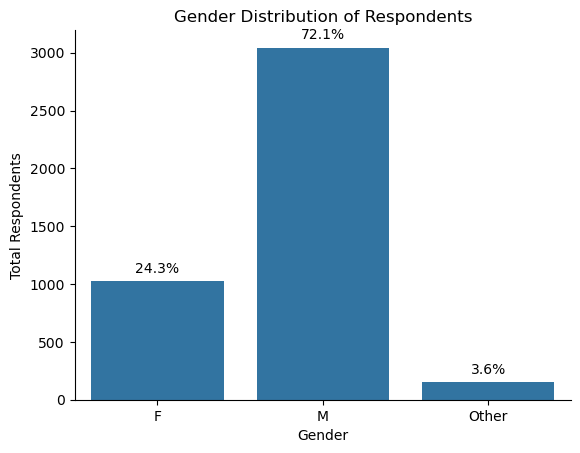

In [33]:
query = """
SELECT 
    COUNT(Answer.UserID) as Total, 
    CASE
        WHEN LOWER(Answer.AnswerText) = 'male' THEN 'M'
        WHEN LOWER(Answer.AnswerText) = 'female' THEN 'F'
        ELSE 'Other'
    END as Gender
FROM 
    Answer
JOIN 
    Question ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 2
GROUP BY 
    Gender
"""
gender_df = pd.read_sql_query(query, conn)
ax = create_barplot(gender_df, 'Gender', 'Total', 'Gender Distribution of Respondents' ,'Gender' ,'Total Respondents')

add_percentage_to_plot(ax)

The gender distribution reveals that the majority of respondents identify as **Male** from the total respondents. This breakdown suggests that the survey sample may predominantly represent the experiences of this gender group, potentially leading to underrepresentation of other gender identities. Such a distribution could introduce sampling bias if mental health experiences vary significantly across different gender identities.

Additionally, the **Other** category, which may include non-binary, gender-nonconforming, and other identities, has a relatively low representation. This limited diversity in gender representation should be considered when interpreting results, as it might not fully capture the experiences of all individuals in the tech industry.

### Nationality Distribution

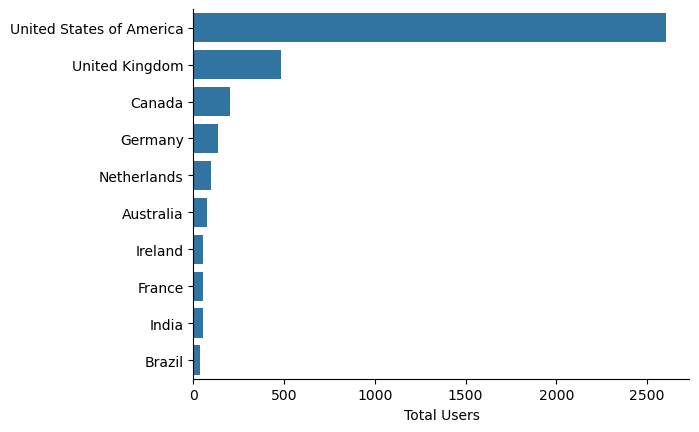

In [34]:
query = """
SELECT 
    COUNT(Answer.UserID) as TotalUsers, 
    Answer.AnswerText
FROM 
    Answer
JOIN 
    Question ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 3
GROUP BY
    Answer.AnswerText
ORDER BY
    TotalUsers DESC 
"""
nationality_df = pd.read_sql_query(query, conn)

nationality_df.loc[nationality_df['AnswerText'].str.contains('United States', regex=True, na=False), 'AnswerText'] = 'United States of America'

sorted_df = nationality_df.groupby(by='AnswerText').sum().sort_values(by='TotalUsers', ascending=False).head(10)
create_barplot(sorted_df, 'TotalUsers', 'AnswerText', '' ,'Total Users' ,'')
plt.show()

- The survey includes responses from 81 different nationalities.
- The USA has the largest number of participants, surpassing the United Kingdom, which ranks second.
- The high number of American respondents is expected due to the survey's focus on mental health in the tech industry.
- Next, we will analyze how American respondents answered the remaining questions.

### Insights 
- The USA has the largest number of respondents in the dataset. In this section, I will conduct a more in-depth analysis of how these individuals responded to specific questions. I have selected questions 5, 6, 9, 12, 29, and 33, which I believe are most relevant to understanding mental health concerns within the tech industry.

- Finally, I will assess the correlation between these questions to explore the hypothesis: "Are individuals in the tech industry more likely to be diagnosed with a mental or physical health disorder, and are they more inclined to discuss these issues in a job interview?"

#### Question 5: Are you self-employed?

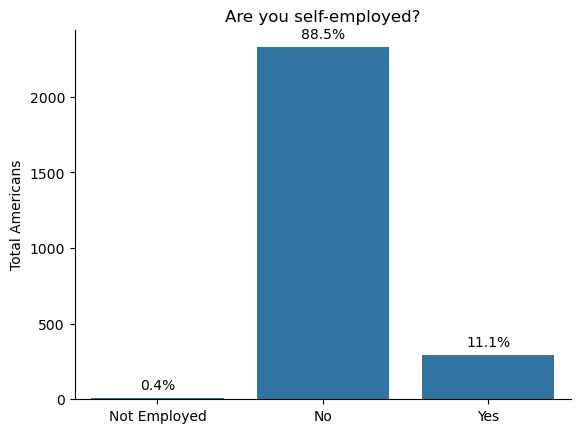

In [35]:
query = """
SELECT
    CASE WHEN AnswerText = 0 THEN 'No' 
         WHEN AnswerText = 1 THEN 'Yes'
        WHEN AnswerText = -1 THEN 'Not Employed'
         ELSE AnswerText 
    END as AnswerText,
    COUNT(DISTINCT UserID) as Total_Americans,
    AnswerText as Answer
FROM
    Answer
WHERE UserID IN
    (
        SELECT 
            UserID
        From 
            Answer
        Where
            AnswerText LIKE '%States%'
    )
    AND QuestionID = 5
GROUP BY
    AnswerText
"""
question5 = pd.read_sql_query(query, conn)
ax = create_barplot(question5, 'AnswerText', 'Total_Americans', 'Are you self-employed?', '', 'Total Americans')
add_percentage_to_plot(ax)

Most Americans are not self-employed, suggesting that they likely work for an organization.

#### Question 6: Do you have a family history of mental illness?

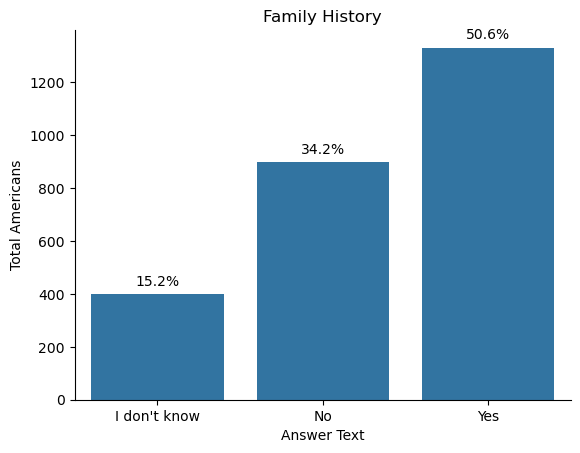

In [36]:
query = """
SELECT
    COUNT(DISTINCT UserID) as Total_Americans,
    AnswerText as Answer
FROM
    Answer
WHERE UserID IN
    (
        SELECT 
            UserID
        From 
            Answer
        Where
            AnswerText LIKE '%States%'
    )
    AND QuestionID = 6
GROUP BY
    AnswerText
"""
question6 = pd.read_sql_query(query, conn)
ax = create_barplot(question6, 'Answer', 'Total_Americans', 'Family History', 'Answer Text', 'Total Americans')
add_percentage_to_plot(ax)
plt.show()

About 900 Americans have no family history of mental illness, while approximately 1,400 do.

#### Question 9 - Is your employer primarily a tech company/organization?

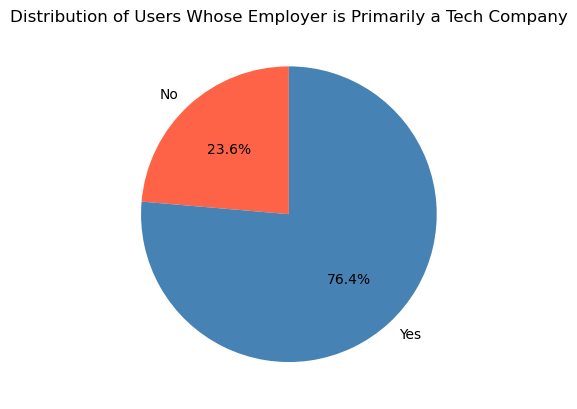

In [37]:
query = """
SELECT
    CASE WHEN AnswerText_Question9 = '0' THEN 'No' 
         WHEN AnswerText_Question9 = '1' THEN 'Yes' 
         ELSE AnswerText_Question9 
    END as AnswerText,
    COUNT(DISTINCT UserID) as TotalUsers
FROM (
    SELECT DISTINCT
        UserID,
        MAX(CASE WHEN QuestionID = 9 THEN AnswerText END) as AnswerText_Question9
    FROM Answer
    WHERE 
        UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 3 AND AnswerText LIKE 'United States%'
        )
        AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 5 AND AnswerText = 0
        )
        AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 6 AND AnswerText = 'Yes'
        )
        AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 7 AND AnswerText = 1
        )
    GROUP BY UserID
) AS Subquery
GROUP BY AnswerText;
"""
question9 = pd.read_sql_query(query, conn)

sizes = question9['TotalUsers']
labels = question9['AnswerText']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#4682B4'])
plt.title('Distribution of Users Whose Employer is Primarily a Tech Company')
plt.show()


#### Question 12 - Would you bring up a mental health issue with a potential employer in an interview?

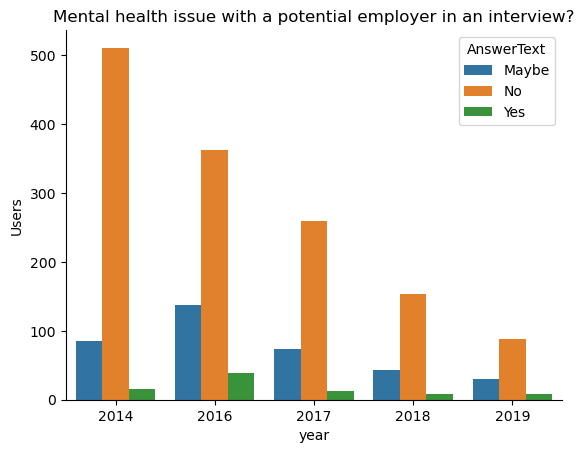

In [38]:
query = """
SELECT
    SurveyID,
    AnswerText,
    COUNT(DISTINCT UserID) as TotalAmericans
FROM
    Answer
WHERE 
    UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 3 AND AnswerText LIKE 'United States%'
        )
    AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 9 AND AnswerText = 1
        )
    AND QuestionID = 12
GROUP BY
    SurveyID, AnswerText
"""

question12 = pd.read_sql_query(query, conn)

create_barplot_hue(
    data=question12, 
    x='SurveyID', 
    y='TotalAmericans', 
    hue='AnswerText', 
    title='Mental health issue with a potential employer in an interview?', 
    xlabel='year', 
    ylabel='Users'
)

#### Question 29: Would you be willing to bring up a physical health issue with a potential employer in an interview?	

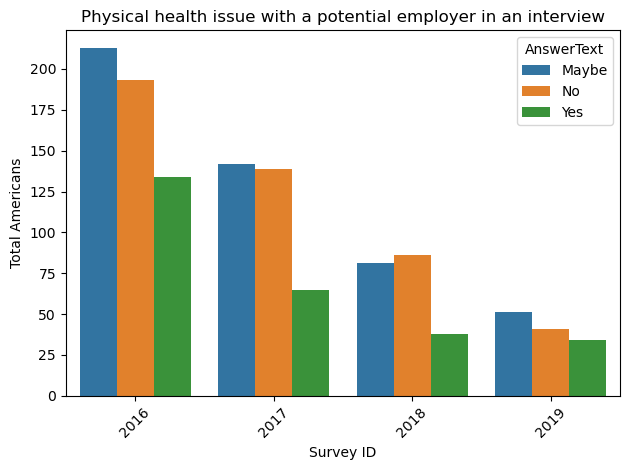

In [39]:
query = """
SELECT
    SurveyID,
    AnswerText,
    COUNT(DISTINCT UserID) as TotalAmericans
FROM
    Answer
WHERE 
    UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 3 AND AnswerText LIKE 'United States%'
        )
    AND UserID IN (
            SELECT UserID FROM Answer WHERE QuestionID = 9 AND AnswerText = 1
        )
    AND QuestionID = 29
GROUP BY
    SurveyID, AnswerText
"""
question29 = pd.read_sql_query(query, conn)

sns.barplot(x='SurveyID', y='TotalAmericans', hue='AnswerText', data=question29)

plt.title('Physical health issue with a potential employer in an interview')
plt.xlabel('Survey ID')
plt.ylabel('Total Americans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Question 33: Do you currently have a mental health disorder?

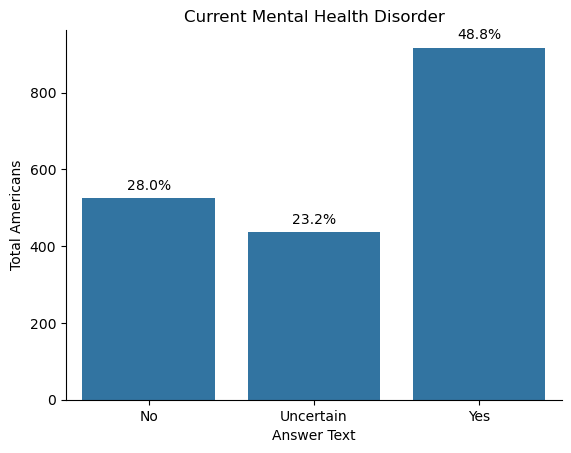

In [40]:
query = """
SELECT
    CASE 
        WHEN AnswerText = '0' THEN 'No' 
        WHEN AnswerText IN ('1', 'possibly') THEN 'Likely' 
        WHEN AnswerText IN ('don''t know', 'may be') THEN 'Uncertain'  -- Combine 'don't know' and 'may be' under 'Uncertain'
        ELSE AnswerText 
    END AS AnswerText,
    COUNT(DISTINCT UserID) AS Total_Americans
FROM
    Answer
WHERE 
    UserID IN (
        SELECT 
            UserID
        FROM 
            Answer
        WHERE
            AnswerText LIKE '%States%'
    )
    AND QuestionID = 33
GROUP BY
    AnswerText

"""
question33 = pd.read_sql_query(query, conn)

# Replace 'don't know' and 'may be' with 'Uncertain'
question33['AnswerText'] = question33['AnswerText'].replace({
    "Don't Know": "Uncertain",
    "Possibly": "Uncertain",
    "Maybe": "Uncertain"
})

# Group the data by 'AnswerText' again after replacement
question33_combined = question33.groupby('AnswerText', as_index=False).agg({'Total_Americans': 'sum'})

ax = create_barplot(
    data=question33_combined, 
    x='AnswerText', 
    y='Total_Americans', 
    title='Current Mental Health Disorder', 
    xlabel='Answer Text', 
    ylabel='Total Americans'
)

# Add percentage annotations to the plot
add_percentage_to_plot(ax)

# Display the plot
plt.show()

Observation: The graph indicates that 48.8% of respondents from the United States reported having a current mental health disorder.

#### Correlation Between Questions 5, 6, 9, 12, 29 and 33

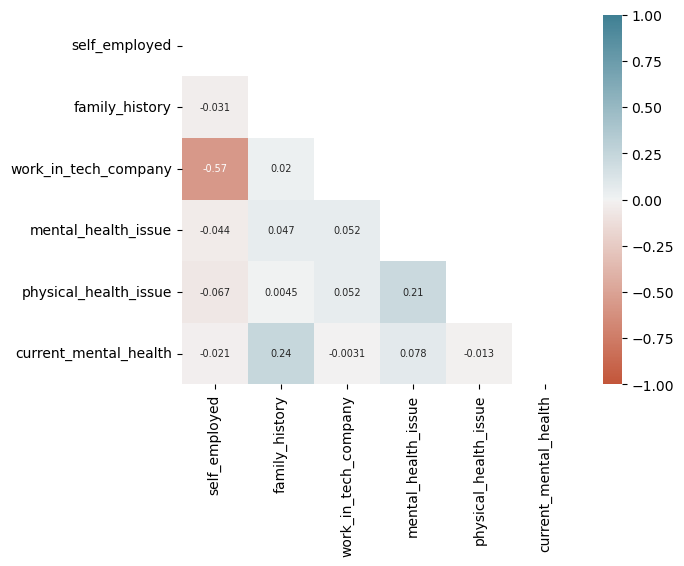

In [41]:
query = """
SELECT
    MAX(CASE WHEN QuestionID = 5 THEN AnswerText END) AS self_employed,
    MAX(CASE WHEN QuestionID = 6 THEN 
        CASE WHEN AnswerText = 'No' THEN 0 
             WHEN AnswerText = 'Yes' THEN 1
             WHEN AnswerText = 'I don''t know' THEN -1
        END
    END) AS family_history,
    MAX(CASE WHEN QuestionID = 9 THEN AnswerText END) AS work_in_tech_company,
    MAX(CASE WHEN QuestionID = 12 THEN 
        CASE WHEN AnswerText = 'No' THEN 0 
             WHEN AnswerText = 'Yes' THEN 1
             WHEN AnswerText = 'Maybe' THEN -1
        END
    END) AS mental_health_issue,
     MAX(CASE WHEN QuestionID = 29 THEN 
        CASE WHEN AnswerText = 'No' THEN 0 
             WHEN AnswerText = 'Yes' THEN 1
             WHEN AnswerText = 'Maybe' THEN -1
        END
    END) AS physical_health_issue,
    MAX(CASE WHEN QuestionID = 33 THEN 
        CASE WHEN AnswerText = 'No' THEN 0 
             WHEN AnswerText = 'Yes' THEN 1
             WHEN AnswerText = 'Maybe' THEN -1
        END
    END) AS current_mental_health
FROM
    Answer
WHERE
    QuestionID IN (5,6,9,12,29,33)
GROUP BY
    UserID;
"""
answers = pd.read_sql_query(query, conn)
answers = answers.corr('spearman')

mask = np.zeros_like(answers)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(answers,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize': 7},
            mask=mask,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))
plt.show()

Observation: Most correlations are weak, indicating that there might be a slight relationship among these variables, but none of them strongly influence each other. The strongest correlation is between self-employment and working in a tech company, which is negative.

## Employment Demographics

#### How many workers state that they work for a tech company in this survey?

In [42]:
tech_company_workers_query = """
    SELECT AnswerText AS tech_worker, 
           COUNT(*) AS num_participants
    FROM Answer
    WHERE QuestionID = 9 
    GROUP BY tech_worker
"""

tech_workers_df = pd.read_sql_query(tech_company_workers_query, conn)

tech_workers_df["tech_worker"] = tech_workers_df["tech_worker"].replace({"-1": "No Answer", "0": "No", "1": "Yes"})

tech_workers_df.set_index("tech_worker", inplace=True)

tech_workers_df


,num_participants
tech_worker,
No Answer,504
No,826
Yes,2888


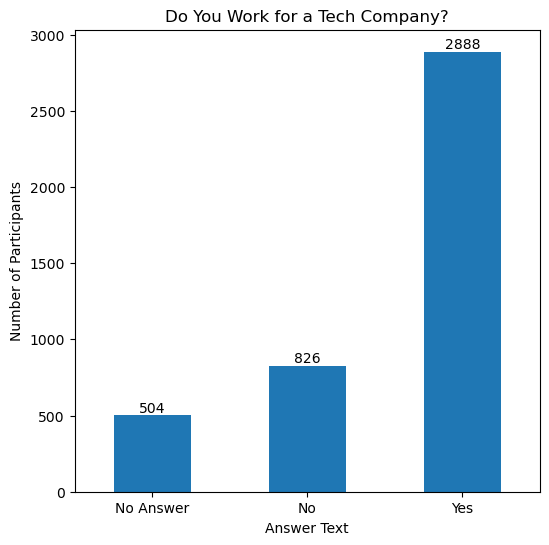

In [43]:
fig, ax = plt.subplots(figsize=(6, 6))
tech_workers_df.plot(kind="bar", legend=False, ax=ax)
plt.title("Do You Work for a Tech Company?")
plt.xlabel("Answer Text")
plt.ylabel("Number of Participants")
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0]);

Observation: Most of the Participants are working for a Tech Companies.

#### Do you work Remotely?

In [44]:
remote_work_query = """
                     SELECT q.questiontext, q.questionid, a.AnswerText, a.SurveyID, a.UserID
                     FROM Question q
                     JOIN Answer a
                     ON q.questionid = a.QuestionID
                     WHERE q.questionid IN (93, 118)
                    """

remote_work_df = pd.read_sql_query(remote_work_query,conn)
remote_work_df

,questiontext,questionid,AnswerText,SurveyID,UserID
0,Do you work remotely (outside of an office) at least 50% of the time?,93,No,2014,1
1,Do you work remotely (outside of an office) at least 50% of the time?,93,No,2014,2
2,Do you work remotely (outside of an office) at least 50% of the time?,93,No,2014,3
3,Do you work remotely (outside of an office) at least 50% of the time?,93,No,2014,4
4,Do you work remotely (outside of an office) at least 50% of the time?,93,No,2014,6
...,...,...,...,...,...
2688,Do you work remotely?,118,Sometimes,2016,2689
2689,Do you work remotely?,118,Sometimes,2016,2690
2690,Do you work remotely?,118,Sometimes,2016,2691
2691,Do you work remotely?,118,Sometimes,2016,2692


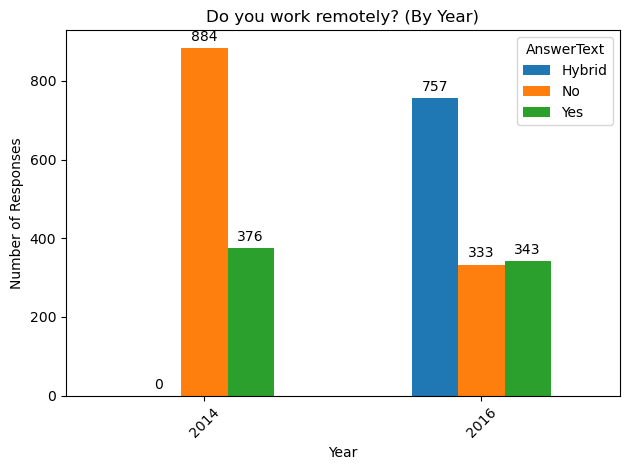

In [45]:
remote_work_df['Year'] = remote_work_df['SurveyID'].astype(str).str[:4]

remote_work_df["AnswerText"] = remote_work_df["AnswerText"].replace({
    "Always": "Yes",
    "Yes": "Yes",
    "No": "No",
    "Never": "No",
    "Sometimes": "Hybrid"
})

grouped_data = remote_work_df.groupby(['Year', 'AnswerText']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind="bar", stacked=False)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Responses")
plt.title("Do you work remotely? (By Year)")

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', padding=3)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Observation: The graph indicates that in 2014, most employees preferred working from the office rather than remotely. However, by 2016, the trend shifted, with hybrid work gaining popularity. In 2016, a greater number of employees favored hybrid work over working exclusively from home or the office.

#### who is self employed?

In [46]:
self_employed_query = """
                      SELECT SurveyID AS year, AnswerText as answer, COUNT(*) as num_responses
                      FROM Answer
                      WHERE QuestionID IN (5) 
                      GROUP BY year, answer
                      HAVING answer = '1'
                      """

self_employed_df = pd.read_sql_query(self_employed_query, conn)
self_employed_df

,year,answer,num_responses
0,2014,1,146
1,2016,1,287
2,2017,1,113
3,2018,1,56
4,2019,1,48


#### Is there any trend in self-employment across the years?

In [47]:
self_employed_query = """
                      WITH yes_responses AS (
                      SELECT SurveyID AS year, AnswerText as answer, COUNT(*) AS yes_responses
                      FROM Answer
                      WHERE QuestionID IN (5) 
                      GROUP BY year, answer
                      HAVING answer = '1'
                      ), 
                      totals AS (SELECT SurveyID AS year, COUNT(*) AS annual_totals
                      FROM Answer
                      WHERE QuestionID IN (5) 
                      GROUP BY year)
                      SELECT y.year as year, (y.yes_responses * 100.0 / t.annual_totals) as yes_percentages
                      FROM yes_responses y 
                      JOIN totals t
                      ON y.year = t.year
                      """

self_employed_df = pd.read_sql_query(self_employed_query, conn)
self_employed_df

,year,yes_percentages
0,2014,11.587302
1,2016,20.027913
2,2017,14.947090
3,2018,13.429257
4,2019,13.636364


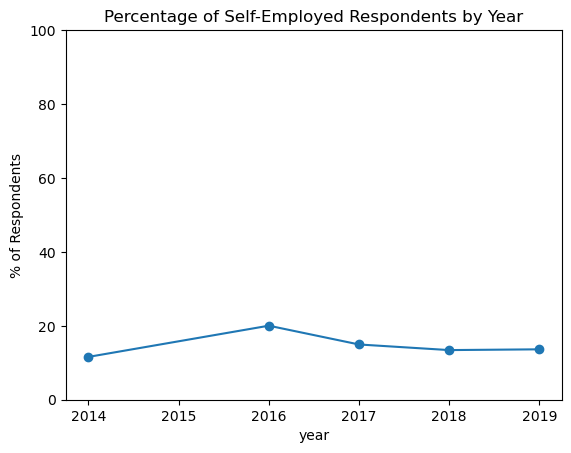

In [48]:
ax = self_employed_df.plot(
    x="year",
    y="yes_percentages",
    kind="line",
    title="Percentage of Self-Employed Respondents by Year",
    legend=False,
    ylim=(0, 100),
    rot=0,
    xlabel="year",
    ylabel="% of Respondents",
)

ax.scatter(self_employed_df["year"], self_employed_df["yes_percentages"])

plt.show()

Observation: The graph illustrates a noticeable increase in the percentage of self-employed individuals in 2016, followed by a decline in subsequent years. This trend suggests that 2016 was a peak year for self-employment, possibly driven by specific economic or societal factors at the time. However, after this period, the proportion of self-employed individuals began to decrease, which may reflect shifts in the job market, changes in economic conditions, or evolving preferences for traditional employment over freelancing or entrepreneurship.

## Mental Health Statistics

In [49]:
mental_health_disorder_query = """
                               SELECT questiontext, questionid
                               FROM Question 
                               WHERE questiontext IN ('Have you ever sought treatment for a mental health disorder from a mental health professional?',
                                                      'Have you had a mental health disorder in the past?',
                                                      'Do you currently have a mental health disorder?',
                                                      'Have you ever been diagnosed with a mental health disorder?',
                                                      'If yes, what condition(s) have you been diagnosed with?',
                                                      'If maybe, what condition(s) do you believe you have?')
                               """

pd.read_sql_query(mental_health_disorder_query, conn)

,questiontext,questionid
0,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
1,Have you had a mental health disorder in the past?,32
2,Do you currently have a mental health disorder?,33
3,Have you ever been diagnosed with a mental health disorder?,34
4,"If yes, what condition(s) have you been diagnosed with?",115
5,"If maybe, what condition(s) do you believe you have?",116


In [50]:
mental_health_query = """
                      SELECT questiontext, questionid
                      FROM Question 
                      WHERE questiontext LIKE '%mental health disorder%'
                      LIMIT 5
                      """

pd.read_sql_query(mental_health_query, conn)

,questiontext,questionid
0,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
1,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,16
2,Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,20
3,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,26
4,Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?,31


In [51]:
conditions_query = """
                   SELECT q.questiontext, q.questionid, a.AnswerText, a.SurveyID
                   FROM Question q
                   JOIN Answer a
                   ON q.questionid = a.QuestionID
                   WHERE q.questionid = 115
                   """

conditions_df = pd.read_sql_query(conditions_query, conn)
conditions_df

,questiontext,questionid,AnswerText,SurveyID
0,"If yes, what condition(s) have you been diagnosed with?",115,-1,2016
1,"If yes, what condition(s) have you been diagnosed with?",115,-1,2016
2,"If yes, what condition(s) have you been diagnosed with?",115,-1,2016
3,"If yes, what condition(s) have you been diagnosed with?",115,-1,2016
4,"If yes, what condition(s) have you been diagnosed with?",115,-1,2016
...,...,...,...,...
2067,"If yes, what condition(s) have you been diagnosed with?",115,Substance Use Disorder,2016
2068,"If yes, what condition(s) have you been diagnosed with?",115,Substance Use Disorder,2016
2069,"If yes, what condition(s) have you been diagnosed with?",115,Substance Use Disorder,2016
2070,"If yes, what condition(s) have you been diagnosed with?",115,Transgender,2016


### Focusing on respondents who work at tech companies, what mental health conditions do they commonly share?

In [52]:
tech_query = """SELECT * 
                FROM Answer
                WHERE LOWER(AnswerText) LIKE '%anxiety%'"""
tech_df = pd.read_sql_query(tech_query, conn)
tech_df

,AnswerText,SurveyID,UserID,QuestionID
0,"Family history of depression. Currently dealing with depression and anxiety, as well as drug addition.\n\nEmployer provides & pays premiums on insurance which covers therapy and prescriptions. Employer allows work-from-home and unlimited PTO which makes episodes easier to control.\n\nI don't speak of my problems to anyone at work except for the people that I consider friends, and even then I don't go into great detail.\n\nI would never bring up a mental health issue during an interview for fear of discrimination and rejection (and therefore greater depression). \n\nOne co-worker had serious anxiety problems and would not inform his team of episodes and was eventually let go for being unresponsive.",2014,160,103
1,"My employer employs 17k people worldwide, and my previous employer only 140 globally, both have been very supportive and accommodating with my moderate depression and intense anxiety.",2014,171,103
2,The form of mental health problem that I suffer is anxiety.,2014,289,103
3,I suffer from mild depression and anxiety.,2014,552,103
4,"I mostly suffer from social anxiety, which keeps me from attending conferences. In my small dev group a big problem is a supervisor who's a workaholic and will never say no when asked to do something, so he's doing the job of at least two ppl (poorly) and working crazy hours, setting the tone for the test of us that work/life balance isn't important.",2014,651,103
...,...,...,...,...
955,"Anxiety Disorder (Generalized, Social, Phobia, etc)",2016,2655,116
956,"Anxiety Disorder (Generalized, Social, Phobia, etc)",2016,2661,116
957,"Anxiety Disorder (Generalized, Social, Phobia, etc)",2016,2666,116
958,"Anxiety Disorder (Generalized, Social, Phobia, etc)",2016,2681,116


In [53]:
diagnosis_mapping = {
    "ADD (w/o Hyperactivity)": "ADD/ADHD",
    "Anxiety Disorder (Generalized, Social, Phobia, etc)": "Anxiety",
    "Autism": "Autism Spectrum",
    "Autism (Asperger's)": "Autism Spectrum",
    "Autism spectrum disorder": "Autism Spectrum",
    "Burn out": "Burnout",
    'Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)': "ADD/ADHD",
    "Depression": "Depression",
    "Dissociative Disorder": "Dissociative Disorder",
    "Eating Disorder (Anorexia, Bulimia, etc)": "Eating Disorder",
    "Gender Dysphoria": "Gender Dysphoria",
    "Mood Disorder (Depression, Bipolar Disorder, etc)": "Depression",
    "PDD-NOS": "PDD-NOS",
    "PTSD (undiagnosed)": "PTSD",
    "Personality Disorder (Borderline, Antisocial, Paranoid, etc)": "Personality Disorder",
    "Pervasive Developmental Disorder (Not Otherwise Specified)": "PDD-NOS",
    "PDD:NOS": "PDD-NOS",
    "Post-traumatic Stress Disorder": "PTSD",
    "Sexual addiction": "Sexual Addiction/Intimacy Disorder",
    "Sleeping Disorder": "Sleep Disorder",
    "Stress Response Syndromes": "Stress Response Syndrome",
    "Substance Use Disorder": "Substance Use/Addiction",
    "Transgender": "Gender Dysphoria",
    "Addictive Disorder": "Substance Use/Addiction",
    "Attention Deficit Hyperactivity Disorder": "ADD/ADHD",
    "Intimate Disorder": "Sexual Addiction/Intimacy Disorder",
    "Obsessive-Compulsive Disorder": "OCD",
    "Psychotic Disorder (Schizophrenia, Schizoaffective, etc)": "Psychotic Disorder",
    "I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.": "Depression",
    "Autism Spectrum Disorder": "Austism Spectrum",
    "Schizotypal Personality Disorder": "Psychotic Disorder",
    "Asperges": "Autism Spectrum",
    "Seasonal Affective Disorder": "Seasonal Affective Disorder",
    "Traumatic Brain Injury": "Traumatic Brain Injury",
}

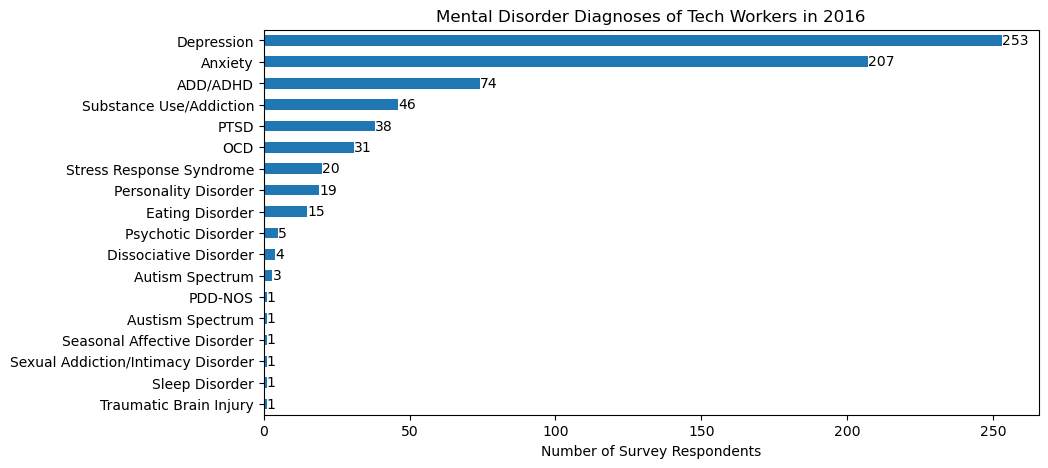

In [54]:
conditions_in_tech_query = """WITH tech_workers AS 
                              (SELECT q.questiontext, q.questionid, a.AnswerText, a.SurveyID, a.UserID
                               FROM Question q
                               JOIN Answer a
                               ON q.questionid = a.QuestionID
                               WHERE (q.questionid = 9 AND a.AnswerText = 1)
                               )
                                SELECT q.questiontext, q.questionid, a.AnswerText, a.SurveyID
                                FROM Question q
                                JOIN Answer a
                                ON q.questionid = a.QuestionID
                                JOIN tech_workers t
                                ON a.UserID = t.UserID
                                WHERE q.questionid = 115
                                """

conditions_in_tech_df = pd.read_sql_query(conditions_in_tech_query, conn)
conditions_in_tech_df.replace(diagnosis_mapping, inplace=True)
conditions_in_tech = conditions_in_tech_df.AnswerText.value_counts(ascending=True)
conditions_in_tech = conditions_in_tech.drop(labels="-1")
ax = conditions_in_tech.plot(
    kind="barh",
    figsize=(10, 5),
    title="Mental Disorder Diagnoses of Tech Workers in 2016",
    ylabel="",
    xlabel="Number of Survey Respondents",
)
ax.bar_label(ax.containers[0])
plt.show()

### Observation:
- The data suggests that depression, anxiety, and ADD/ADHD are the most common mental health issues among tech workers, with these three conditions having significantly higher frequencies than other disorders.
- This could indicate a need for mental health resources focused on addressing these conditions in the tech industry.
- The presence of substance use issues and PTSD also highlights additional areas where support may be benifivial for tech workers.

#### Which mental health conditions correspond to different professions?

In [55]:
diagnoses_by_job_query = """
        WITH positions AS
        (SELECT UserID, AnswerText as job, QuestionID
        FROM Answer
        WHERE QuestionID = 117
        ) 
        SELECT p.job, a.AnswerText as diagnosis, COUNT(*)
        FROM Answer a
        JOIN positions p 
        ON a.UserID = p.UserID 
        GROUP BY p.job, diagnosis
        HAVING a.QuestionID = 115 AND p.job IN ("Back-end Developer",
                                                "Front-end Developer",
                                                "Supervisor/Team Lead",
                                                "DevOps/SysAdmin",
                                                "Designer")        
        ORDER BY COUNT(*) DESC
        """

diagnoses_by_job_df = pd.read_sql_query(diagnoses_by_job_query, conn)
diagnoses_by_job_df = diagnoses_by_job_df.groupby(["job", "diagnosis"]).sum("COUNT(*)")
diagnoses_by_job_df.reset_index()
jobs = diagnoses_by_job_df.index.get_level_values(level=0).unique()
diagnoses_by_job_df.rename(index=diagnosis_mapping, inplace=True)
diagnoses_by_job_df = diagnoses_by_job_df.groupby(["job", "diagnosis"]).sum("COUNT(*)")
diagnoses_by_job_df = diagnoses_by_job_df.reset_index()

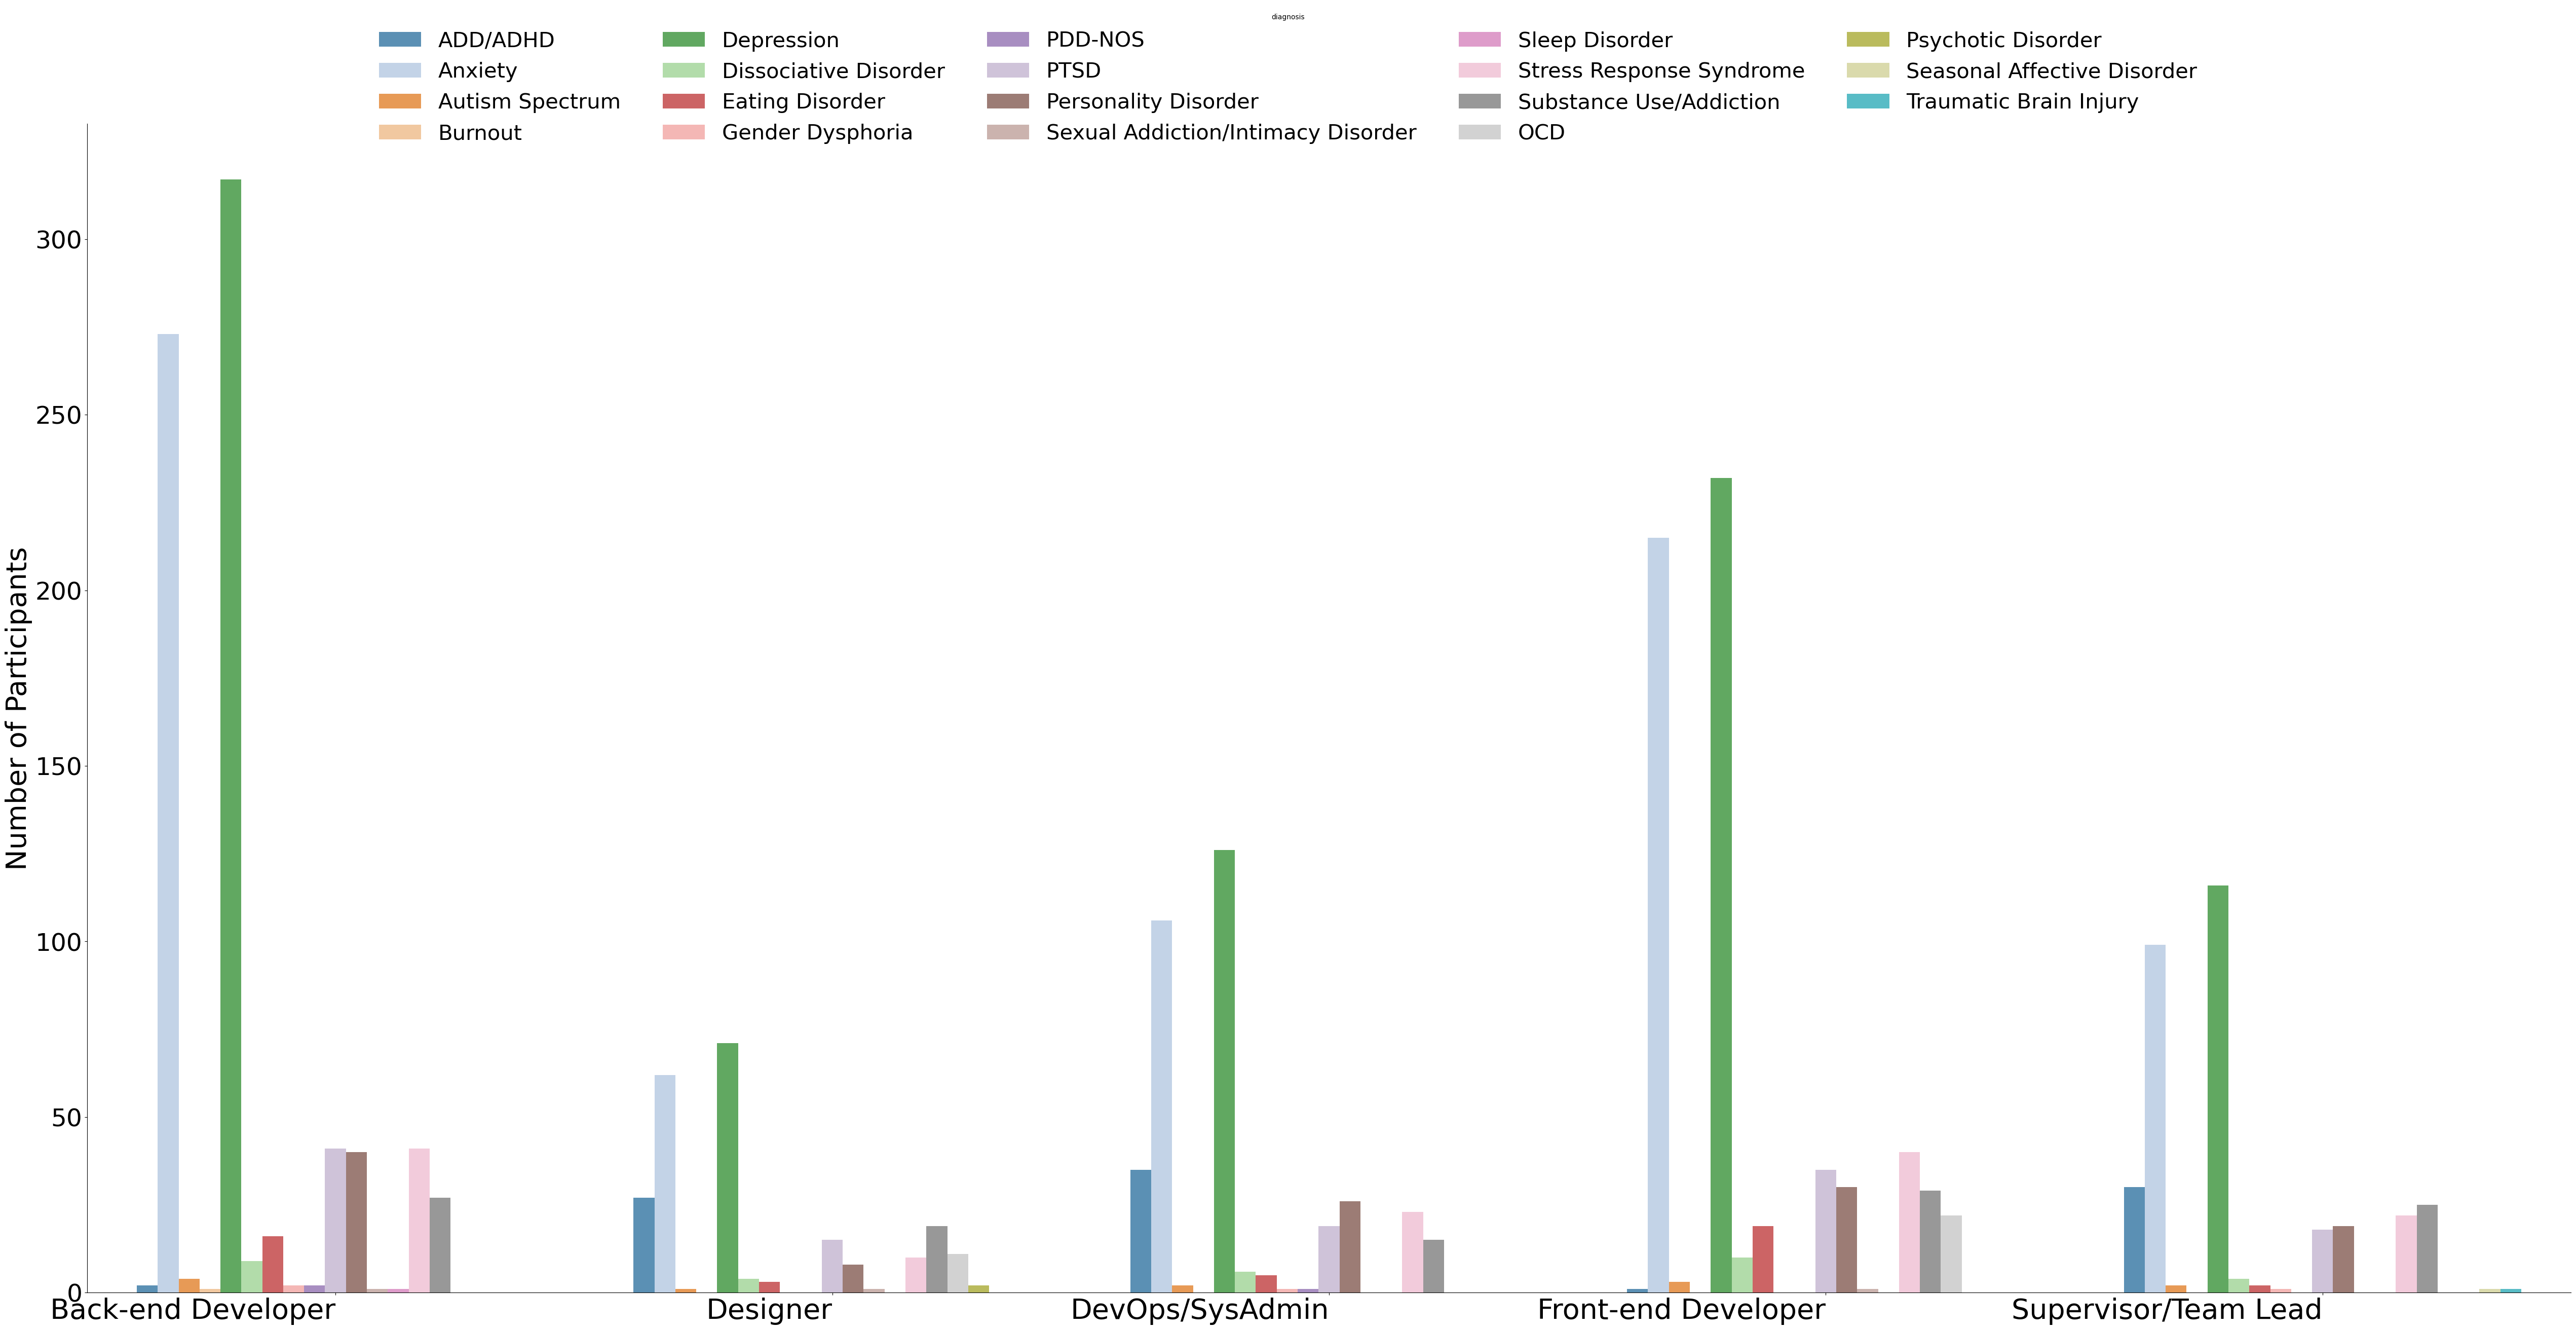

In [56]:
custom_palette = sns.color_palette("tab20", 19)

g = sns.catplot(
    data=diagnoses_by_job_df,
    kind="bar",
    x="job",
    y="COUNT(*)",
    hue="diagnosis",
    errorbar="sd",
    palette=custom_palette,
    alpha=0.8,
    height=24,
    aspect=2,
    order=jobs,
)

sns.move_legend(
    g, "upper center", bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=30
)

g.set_xticklabels(rotation=0, ha="right", fontsize=40)

g.set(
    xlabel=None,
    ylabel="Number of Participants",
)
g.set_titles("Diagnoses by Tech Job", size=40)
g.set_axis_labels(None, "Number of Participants", fontsize=40)

g.ax.tick_params(axis='y', labelsize=35)

plt.tight_layout()

plt.show()

### Observation: 
- The chart suggests that *depression is most common among backend developers,* followed by front-end developers and DevOps/SysAdmin roles.
- Anxiety and burnout also seem to be notable issues in tech, particularly in roles with high stress levels, such as backend development and DevOps.
- Other mental health conditions appear less frequently across these roles.
- This might indicate a need for mental health support specifically targeted toward those in high-stress or backend positions in the tech industry.

## Exploring the Relationship Between Mental Health Experiences and Leave Difficulty

To investigate the link between challenges in requesting leave and individuals who have encountered or witnessed negative workplace interactions related to mental health, I conducted a correlation analysis based on survey responses. Specifically, I looked at the following survey questions:

- **Question 56**: *Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?*
- **Question 105**: *Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?*
- **Questions 17 and 97**: *If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? How easy is it for you to take medical leave for a mental health condition?*

The focus of this analysis is on workers who have either personally experienced or witnessed negative mental health-related interactions at work. I grouped the survey data into two primary categories for comparison:

1. **Bad Interactions (Bad Interaction Group)**: Workers who reported experiencing or observing negative mental health interactions (based on responses to Question 56 or Question 105).
2. **Leave Difficulty**: Workers' perceptions of how easy or difficult it would be to request medical leave for a mental health condition (based on responses to Questions 17 and 97).


In [57]:
bad_experiences_query = """
        WITH bad_interaction AS (
        SELECT q.questiontext, q.questionid, a.AnswerText, a.UserID
        FROM Question q
        JOIN Answer a
        ON q.questionid = a.QuestionID
        WHERE q.questionid IN (56, 105) 
              AND a.AnswerText NOT IN ('-1', "I've always been self-employed", 'Maybe/Not sure', "I don't know", "Don't know")
        ), 
        company_leave AS (
        SELECT q.questiontext, q.questionid, a.AnswerText, a.UserID
        FROM Question q
        JOIN Answer a
        ON q.questionid = a.QuestionID
        WHERE q.questionid IN (17, 97) 
              AND a.AnswerText NOT IN ('-1', "I've always been self-employed", 'Maybe/Not sure', "I don't know", "Don't know")
        )
        SELECT b.AnswerText as seen_interaction, c.AnswerText as leave_difficulty
        FROM bad_interaction b
        JOIN company_leave c
        ON b.UserID = c.UserID
        """

answer_mapper = {
    "Difficult": 6,
    "Neither easy nor difficult": 4,
    "Somewhat difficult": 5,
    "Somewhat easy": 3,
    "Very difficult": 7,
    "Very easy": 1,
    "No": 0,
    "Yes, I experienced": 1,
    "Yes, I observed": 1,
    "Yes": 1,
}

pd.set_option('future.no_silent_downcasting', True)
bad_experiences_df = pd.read_sql_query(bad_experiences_query, conn)
bad_experiences_df.replace(answer_mapper, inplace=True)
bad_experiences_df

,seen_interaction,leave_difficulty
0,0,1
1,0,3
2,0,3
3,0,5
4,0,1
...,...,...
2500,1,4
2501,1,7
2502,1,7
2503,1,3


In [58]:
bad_experiences_df["seen_interaction"] = bad_experiences_df["seen_interaction"].astype("boolean")
bad_experiences_df["leave_difficulty"] = bad_experiences_df["leave_difficulty"].astype("int")

In [59]:
correlation, p_value = pointbiserialr(
    bad_experiences_df["seen_interaction"], bad_experiences_df["leave_difficulty"]
)

print(f"Point-Biserial Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Point-Biserial Correlation: 0.148
P-value: 0.000


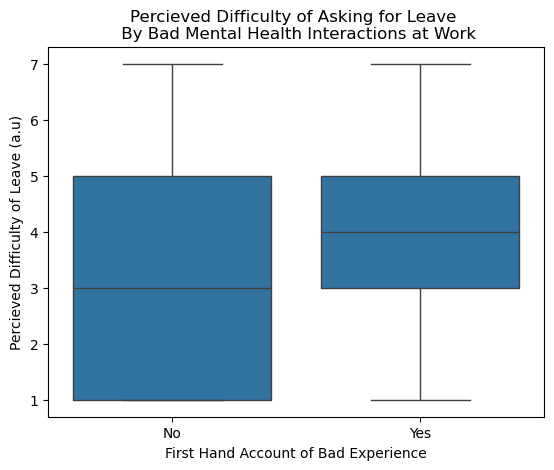

In [60]:
sns.boxplot(x="seen_interaction", y="leave_difficulty", data=bad_experiences_df)
plt.xlabel("First Hand Account of Bad Experience")
plt.ylabel("Percieved Difficulty of Leave (a.u)")
plt.title(
    "Percieved Difficulty of Asking for Leave \n By Bad Mental Health Interactions at Work"
)
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

#### Further Statistical Analysis of Bad Experiences

To delve deeper into the impact of bad experiences, I will:

- Conduct an independent samples t-test to determine if there is a statistically significant difference between the two groups (using an alpha level of 0.05).
- Calculate the effect size using Cohen's d to assess the magnitude of the difference between groups.
- Examine the mean difference between the groups and evaluate the pooled standard deviation of the data.
- The **independent samples t-test** is used here to compare the means of two independent groups to see if there is a significant difference in how difficult it is for individuals to request leave based on their work experiences. The test provides statistical evidence (p-value) and magnitude of the difference (Cohen's d), supporting the conclusion that bad work experiences have a moderate effect on the ease of requesting leave.


In [61]:
group1 = bad_experiences_df[bad_experiences_df["seen_interaction"] == 0][
    "leave_difficulty"
]
group2 = bad_experiences_df[bad_experiences_df["seen_interaction"] == 1][
    "leave_difficulty"
]

t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)
mean_difference = group1.mean() - group2.mean()
pooled_std = ((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / (
    len(bad_experiences_df) - 2
)

cohen_d = mean_difference / (pooled_std**0.5)

print(f"Mean Difference: {mean_difference:.3f}")
print(f"Pooled Standard Deviation: {pooled_std:.3f}")
print(f"t-statistic: {t_statistic:.3f}, p=value: {p_value:.3f}")
print(f"Cohen's d: {np.abs(cohen_d):.3f}")

Mean Difference: -0.589
Pooled Standard Deviation: 3.154
t-statistic: -7.446, p=value: 0.000
Cohen's d: 0.331


**Observation**: Overall, the analysis suggests a moderate effect size (d = 0.331). 

Individuals with negative mental health experiences at work tend to find it harder to request leave, as shown by a significant difference of 0.589 survey units, with those without bad experiences reporting it easier on average.

#### Does size of company (question 8) correspond to whether it is easier or harder to ask for leave (questions 17, 97)?

In [62]:
query = """
        WITH company_size AS (
        SELECT AnswerText, QuestionID, UserID
        FROM Answer
        WHERE QuestionID = 8 AND AnswerText NOT IN (-1)),
        leave_difficulty AS (
        SELECT AnswerText, QuestionID, UserID
        FROM Answer
        WHERE QuestionID IN (17, 97) AND AnswerText NOT IN (-1, "Don't know", "I don't know")
        )
        SELECT c.AnswerText as company_size, l.AnswerText as difficulty_asking_for_leave
        FROM company_size c
        JOIN leave_difficulty l 
        ON c.UserID = l.UserID
        """

query_df = pd.read_sql_query(query, conn)

encoding_variable1 = {
    "1-5": 3,
    "6-25": 15.5,
    "26-100": 63,
    "100-500": 300,
    "500-1000": 750,
    "More than 1000": 1500,
}
query_df["company_size_encoded"] = query_df["company_size"].map(
    encoding_variable1)

encoding_variable2 = {
    "Very difficult": 1,
    "Difficult": 2,
    "Somewhat difficult": 3,
    "Neither easy nor difficult": 4,
    "Somewhat easy": 6,
    "Very easy": 7,
}
query_df["difficulty_asking_encoded"] = query_df["difficulty_asking_for_leave"].map(
    encoding_variable2
)
correlation, p_value = spearmanr(
    query_df["company_size_encoded"], query_df["difficulty_asking_encoded"]
)
print(
    f"""
    It does not appear that the difficulty of leave correlates to the size of the company. 
    Correlation: {correlation:.2f}, p-value: {p_value:.4f}
    """
)


    It does not appear that the difficulty of leave correlates to the size of the company. 
    Correlation: -0.02, p-value: 0.2233
    


### Prevalence Rate of Mental Health Conditions with 95% Confidence Intervals

In this analysis, we calculate and visualize the prevalence rates of three mental health conditions—**Depression**, **Anxiety**, and **ADD/ADHD**—among survey respondents. The prevalence rate is computed by dividing the number of respondents reporting each condition by the total number of respondents in the year 2016.

Additionally, we calculate the standard error (SE) of the prevalence rates, followed by the 95% confidence intervals (CI). The confidence intervals represent the range within which we are 95% confident the true prevalence rate lies.

In [63]:
# Query to get the total users who answered question with ID 115
query = """
SELECT 
    Question.QuestionID AS QuestionId,
    COUNT(AnswerText) AS TotalUsersAnswered
FROM 
    Question
JOIN
    Answer ON Question.QuestionID = Answer.QuestionID
WHERE 
    Question.QuestionID = 115
GROUP BY 
    Question.QuestionID
"""

question_115_df = pd.read_sql_query(query, conn)

print(question_115_df)


   QuestionId  TotalUsersAnswered
0         115                2072


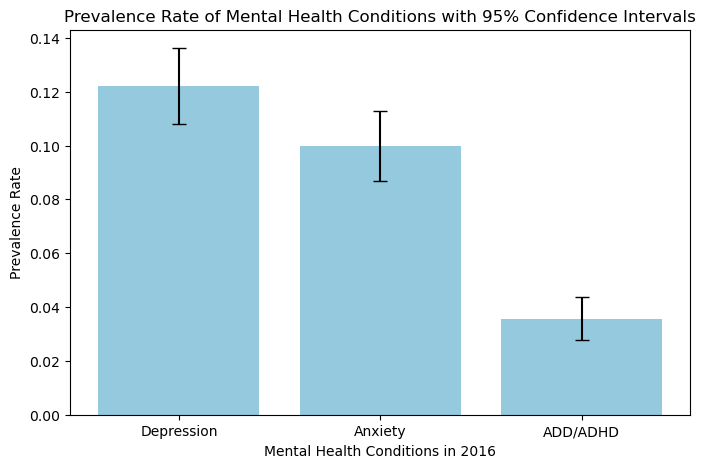

In [64]:
# Data for mental health conditions
conditions = ['Depression', 'Anxiety', 'ADD/ADHD']
counts = [253, 207, 74]
total_respondents_2016 = 2072

prevalence_rates = np.array(counts) / total_respondents_2016

se = np.sqrt(prevalence_rates * (1 - prevalence_rates) / total_respondents_2016)

confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
ci_lower = prevalence_rates - z_score * se
ci_upper = prevalence_rates + z_score * se

fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=conditions, y=prevalence_rates, ax=ax, color='skyblue')

ax.errorbar(
    conditions, 
    prevalence_rates, 
    yerr=[prevalence_rates - ci_lower, ci_upper - prevalence_rates], 
    fmt='none', 
    color='black', 
    capsize=5
)

ax.set_ylabel('Prevalence Rate')
ax.set_xlabel('Mental Health Conditions in 2016')
ax.set_title('Prevalence Rate of Mental Health Conditions with 95% Confidence Intervals')

plt.show()

## Conclusions

This analysis provides an insightful overview of mental health trends among tech industry professionals. Key findings include:

1. **Prevalence Rates**: The analysis identified the prevalence of certain mental health conditions within the tech workforce. These findings suggest that mental health issues are common in this industry, likely due to high-stress environments and demanding workloads.
2. **Demographic Trends**: Age, gender, and nationality showed varied associations with mental health conditions. For instance, certain demographics exhibited higher prevalence rates, indicating the need for tailored mental health support.
3. **Influence of Workplace Factors**: Factors like workplace culture, accessibility to mental health resources, and managerial support had significant effects on mental health outcomes. These insights underline the importance of fostering supportive environments.

## Further Improvements

1. **Data Enrichment**: Future studies could benefit from integrating additional data points, such as specific job roles, hours worked per week, and remote work status, to capture a more comprehensive view of mental health drivers.
2. **Advanced Statistical Modeling**: Applying logistic regression or machine learning models could offer deeper insights into the predictors of mental health issues, revealing potential intervention points.
3. **Time Series Analysis**: If longitudinal data becomes available, tracking mental health trends over time could reveal how industry changes impact mental health.
4. **Regional Comparison**: Analyzing data at the regional level may uncover location-specific trends, supporting region-based mental health programs.
5. **Survey Refinement**: Improvements in survey design, such as including more detailed mental health questions and ensuring anonymity, could yield more reliable data.

By enhancing the dataset and applying advanced techniques, future analyses can better understand and address mental health issues in the tech industry.